In [53]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import mne
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [3]:
# epileptics
n = pd.read_csv('n_output.txt', header = None)
n = np.reshape(n.values, (100, 4097))
n = pd.DataFrame(n)
# 2 seconds before seizure onset
n = n.loc[:, 3700:4097]
n.head()

,3700,3701,3702,3703,3704,3705,3706,3707,3708,3709,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,20,20,19,23,29,35,30,24,20,22,...,11,-12,-22,-25,-21,-22,-29,-37,-40,-64
1,150,137,120,88,62,44,42,43,41,42,...,-47,-63,-63,-50,-39,-25,-19,-14,-9,-37
2,2,1,2,-5,-4,-8,-5,-10,-9,5,...,-22,-32,-47,-52,-52,-43,-33,-38,-42,5
3,-63,-48,-38,-26,-4,22,45,57,63,72,...,42,47,58,65,74,70,72,67,65,-31
4,-42,-31,-28,-10,1,-29,3,-50,-29,7,...,195,184,164,145,167,185,245,209,150,-51


In [4]:
z = pd.read_csv('z_output.txt', header = None)
z = np.reshape(z.values, (100, 4097))
z = pd.DataFrame(z)
z = z.loc[:, 3700:4097]
z.head()

,3700,3701,3702,3703,3704,3705,3706,3707,3708,3709,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,-26,-29,-39,-59,-66,-54,-43,-43,-40,-47,...,-31,-28,-21,-14,-14,-25,-28,-11,8,77
1,-117,-112,-115,-86,-44,3,47,79,85,55,...,-63,-82,-114,-138,-159,-172,-180,-173,-162,-82
2,81,66,36,33,28,34,32,17,2,6,...,-91,-52,-23,-14,-5,-3,7,3,4,82
3,3,-25,-42,-45,2,-6,-32,-84,-64,6,...,-32,-32,-40,-23,-1,11,12,-6,10,33
4,-33,-17,13,40,36,39,24,5,-8,-21,...,1,-19,-29,-35,-51,-55,-58,-32,-6,-17


In [5]:
info = mne.create_info(100,  173.61, ch_types='eeg')
n_raw = mne.io.RawArray(n.values, info)
z_raw = mne.io.RawArray(z.values, info) 
n_raw.filter(1,30, method='iir')
z_raw.filter(1, 30, method = 'iir')

Creating RawArray with float64 data, n_channels=100, n_times=397
    Range : 0 ... 396 =      0.000 ...     2.281 secs
Ready.
Creating RawArray with float64 data, n_channels=100, n_times=397
    Range : 0 ... 396 =      0.000 ...     2.281 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB



<RawArray  |  None, n_channels x n_times : 100 x 397 (2.3 sec), ~503 kB, data loaded>

In [6]:
# n_lbl = np.full(100, 'e')
# z_lbl = np.full(100, 'h')
# n['Condition'] = n_lbl
# z['Condition'] = z_lbl
nz = pd.concat([n, z], ignore_index = True)

In [7]:
info = mne.create_info(200,  173.61, ch_types='eeg')
raw = mne.io.RawArray(nz.values, info)
raw.filter(1,30, method='iir')

Creating RawArray with float64 data, n_channels=200, n_times=397
    Range : 0 ... 396 =      0.000 ...     2.281 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB



<RawArray  |  None, n_channels x n_times : 200 x 397 (2.3 sec), ~1001 kB, data loaded>

In [8]:
sampling_freq = raw.info['sfreq']
start_stop_seconds = np.array([0, 2])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index = 0
raw_selection = raw[channel_index, start_sample:stop_sample]
print(raw_selection)

(array([[ -0.20116649,  -0.98464115,   0.93017001,   5.97286968,
         11.68720462,  14.47264421,  12.60067304,   8.03081265,
          5.22127619,   7.64784838,  14.82567672,  22.34349933,
         25.03018783,  20.84302025,  12.42704098,   5.13017024,
          3.11293383,   6.64487157,  12.49932251,  16.68830133,
         17.07272691,  14.0079501 ,   9.16067075,   3.94000315,
         -1.2078436 ,  -6.33455666, -10.87889925, -12.98521421,
        -10.31674511,  -2.25837719,   8.36958864,  16.26970726,
         17.24377628,  11.50281991,   3.56514149,  -1.43899173,
         -1.90260414,  -0.75895778,  -2.63414695,  -9.67894208,
        -19.52291696, -26.82771964, -27.02315845, -19.36651627,
         -7.34907605,   3.37824586,   7.87575168,   4.0072248 ,
         -6.818987  , -20.22965318, -30.71255437, -34.23992382,
        -30.3299132 , -21.93717395, -12.97617262,  -5.42083369,
          1.44490431,   9.00283151,  16.70214292,  21.73224887,
         21.42357351,  15.99364466,   8

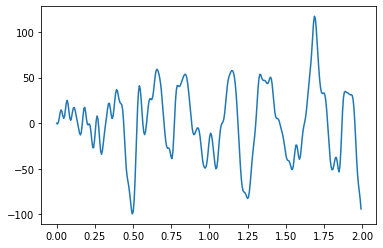

In [9]:
x = raw_selection[1]
y = raw_selection[0].T
plt.plot(x, y);

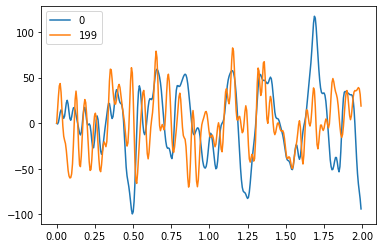

In [10]:
channel_names = [0, 199]
two_eeg_chans = raw[channel_names, start_sample:stop_sample]
y_offset = np.array([5e-11, 0])  # just enough to separate the channel traces
x = two_eeg_chans[1]
y = two_eeg_chans[0].T + y_offset
lines = plt.plot(x, y)
plt.legend(lines, channel_names);

In [11]:
n_raw[0][0]

array([[-2.01166493e-01, -9.84641153e-01,  9.30170014e-01,
         5.97286968e+00,  1.16872046e+01,  1.44726442e+01,
         1.26006730e+01,  8.03081265e+00,  5.22127619e+00,
         7.64784838e+00,  1.48256767e+01,  2.23434993e+01,
         2.50301878e+01,  2.08430202e+01,  1.24270410e+01,
         5.13017024e+00,  3.11293383e+00,  6.64487157e+00,
         1.24993225e+01,  1.66883013e+01,  1.70727269e+01,
         1.40079501e+01,  9.16067075e+00,  3.94000315e+00,
        -1.20784360e+00, -6.33455666e+00, -1.08788993e+01,
        -1.29852142e+01, -1.03167451e+01, -2.25837719e+00,
         8.36958864e+00,  1.62697073e+01,  1.72437763e+01,
         1.15028199e+01,  3.56514149e+00, -1.43899173e+00,
        -1.90260414e+00, -7.58957776e-01, -2.63414695e+00,
        -9.67894208e+00, -1.95229170e+01, -2.68277196e+01,
        -2.70231584e+01, -1.93665163e+01, -7.34907605e+00,
         3.37824586e+00,  7.87575168e+00,  4.00722480e+00,
        -6.81898700e+00, -2.02296532e+01, -3.07125544e+0

In [12]:
def ApEn(U, m, r) -> float:
    """Approximate_entropy."""

    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)

    return abs(_phi(m+1) - _phi(m))

In [13]:
n_val = pd.read_csv('n_output.txt', header = None)
n_r = np.std(n_val.values) * 0.2
n_r

11.877165074233327

In [14]:
ApEn(n_raw[2][0][0], 2, n_r)

0.5543547774366586

In [15]:
n_apen = []
for i in range(80):
    n_chan = n_raw[i][0][0]
    n_apen += [ApEn(n_chan, 2, n_r)]

In [16]:
z_val = pd.read_csv('z_output.txt', header = None)
z_r = np.std(z_val.values) * 0.2
z_r

9.667791962091918

In [17]:
z_apen = []
for i in range(80):
    z_chan = z_raw[i][0][0]
    z_apen += [ApEn(z_chan, 2, z_r)]

In [18]:
def SampEn(U, m, r):

    def _maxdist(x_i, x_j):
        result = max([abs(ua - va) for ua, va in zip(x_i, x_j)])
        return result

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = 0
        for i in range(len(x)):
            for j in range(len(x)):
                if i == j:
                    continue
                C += (_maxdist(x[i], x[j]) <= r)
        return C

    N = len(U)
    
    return -np.log(_phi(m+1) / _phi(m))

In [19]:
n_sampen = []
for i in range(80):
    n_chan = n_raw[i][0][0]
    n_sampen += [SampEn(n_chan, 2, n_r)]
z_sampen = []
for i in range(80):
    z_chan = z_raw[i][0][0]
    z_sampen += [SampEn(z_chan, 2, z_r)]

In [20]:
classes = np.concatenate([np.full(80, 0), np.full(80, 1)])
len(classes)

160

In [21]:
colors = np.concatenate([np.full(80, 'green'), np.full(80, 'red')])

In [22]:
entropies = {'ApEn': n_apen + z_apen, 'SampEn': n_sampen + z_sampen, 
            'Class': classes} 
train = pd.DataFrame(entropies)
train.head()

,ApEn,SampEn,Class
0,0.509262,0.485454,0
1,0.534940,0.575632,0
2,0.554355,0.434732,0
3,0.514679,0.492050,0
4,0.656920,0.898906,0


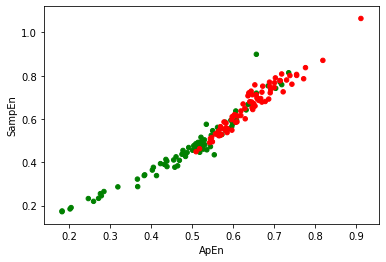

In [23]:
train.plot.scatter(x = 'ApEn', y = 'SampEn', c = colors);

In [28]:
n_test_apen = []
for i in range(80, 100):
    n_chan = n_raw[i][0][0]
    n_test_apen += [ApEn(n_chan, 2, n_r)]
z_test_apen = []
for i in range(80, 100):
    z_chan = z_raw[i][0][0]
    z_test_apen += [ApEn(z_chan, 2, z_r)]
n_test_sampen = []
for i in range(80, 100):
    n_chan = n_raw[i][0][0]
    n_test_sampen += [SampEn(n_chan, 2, n_r)]
z_test_sampen = []
for i in range(80, 100):
    z_chan = z_raw[i][0][0]
    z_test_sampen += [SampEn(z_chan, 2, z_r)]
len(z_test_sampen)
test_classes = np.concatenate([np.full(20, 0), np.full(20, 1)])
test_entropies = {'ApEn': n_test_apen + z_test_apen, 'SampEn': n_test_sampen + z_test_sampen, 
            'Class': test_classes} 
test = pd.DataFrame(test_entropies)
test.head()

,ApEn,SampEn,Class
0,0.271196,0.251777,0
1,0.529175,0.507173,0
2,0.179551,0.170584,0
3,0.494671,0.459829,0
4,0.658918,0.668206,0


In [43]:
test_features = test.iloc[:,:2]
train_features = train.iloc[:,:2]
test_features.head()

,ApEn,SampEn
0,0.271196,0.251777
1,0.529175,0.507173
2,0.179551,0.170584
3,0.494671,0.459829
4,0.658918,0.668206


In [55]:
all_en = pd.concat([train, test])
all_en.head()

,ApEn,SampEn,Class
0,0.509262,0.485454,0
1,0.534940,0.575632,0
2,0.554355,0.434732,0
3,0.514679,0.492050,0
4,0.656920,0.898906,0


In [51]:
def dist_to_train(test_row):
    dists = []
    for train_i in range(80):
        train_row = train_features.iloc[train_i]
        dists += [(sum((test_row - train_row)**2))**.5]
    return dists

In [65]:
X = all_en[['ApEn', 'SampEn']]
y = all_en[['Class']].values.reshape(200)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [66]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [69]:
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1])

In [70]:
confusion_matrix(y_test, y_pred)

array([[17,  8],
       [ 2, 23]], dtype=int64)

In [71]:
(17+23)/(17+8+2+23)

0.8